##### Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


##### Preprocessing


In [2]:
# Load and read
input_file = "cleaned_data.csv"
preprocessed_data = 'q3_preprocessed_data.csv'
monthly_values = 'q3_month_data.csv'
df = pd.read_csv(input_file, header=None, skiprows=1) # Skip header row

# Extract necessary columns, rename, and remove N/A rows to avoid unexpected errors and ensure complete data
columns_to_extract = [0, 7, 8]  # date arrest_made, and citation_issued
extracted_columns = df[columns_to_extract].dropna(subset=[0, 7, 8])  
extracted_columns.columns = ['date', 'arrested', 'citation_given']

# Convert dates to datetime objects for ease of data manipulation
extracted_columns['date'] = pd.to_datetime(extracted_columns['date']) 
pd.set_option('display.colheader_justify', 'center')  # Center column text 
print(extracted_columns.head().to_string(index=False))  # View data before filtering by year (2013 and 2018 lack full year data)

   date    arrested citation_given
2013-09-01  False       False     
2013-09-01  False       False     
2013-09-01  False        True     
2013-09-01  False       False     
2013-09-01  False       False     


In [3]:
# Further clean data by only keeping data from 2014 - 2017
print() # new line for readability
years_filtered = extracted_columns[(extracted_columns['date'].dt.year >= 2014) & (extracted_columns['date'].dt.year <= 2017)]
pd.set_option('display.colheader_justify', 'center') 
years_filtered.to_csv(preprocessed_data, index=False)
print(years_filtered.head().to_string(index=False)) 


   date    arrested citation_given
2014-01-01  False       False     
2014-01-01   True       False     
2014-01-01  False        True     
2014-01-01  False       False     
2014-01-01  False       False     


In [4]:
# Group by each month and calculuate their sums
years_filtered = years_filtered.copy() # make a copy
years_filtered.loc[:, 'month'] = years_filtered['date'].dt.month # for all rows make a new column month, value comes from extracting month from date
values_per_month = years_filtered.groupby('month')[['arrested', 'citation_given']].sum() # group by month and find sum of arrests and citations
values_per_month = values_per_month.reset_index() # reset index so month is not treated as index
values_per_month.to_csv(monthly_values)
print(values_per_month.to_string(index=False)) 

 month arrested citation_given
   1     375         475      
   2     287         372      
   3     289         449      
   4     350         463      
   5     312         498      
   6     329         513      
   7     293         481      
   8     238         501      
   9     317         567      
  10     328         571      
  11     283         522      
  12     244         500      


##### Visualization

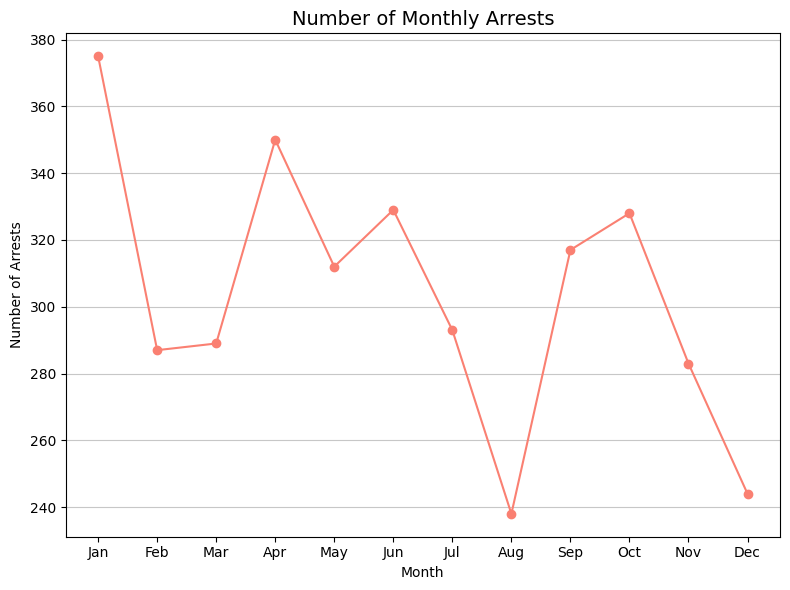

In [5]:
# Plotting line chart for monthly arrests
plt.figure(figsize=(8, 6))
plt.plot(values_per_month.index, values_per_month['arrested'], marker='o', label='Arrests', color='salmon')
plt.title('Number of Monthly Arrests', fontsize=14)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Number of Arrests', fontsize=10)
plt.xticks(ticks=values_per_month.index, labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.tight_layout()
plt.show()

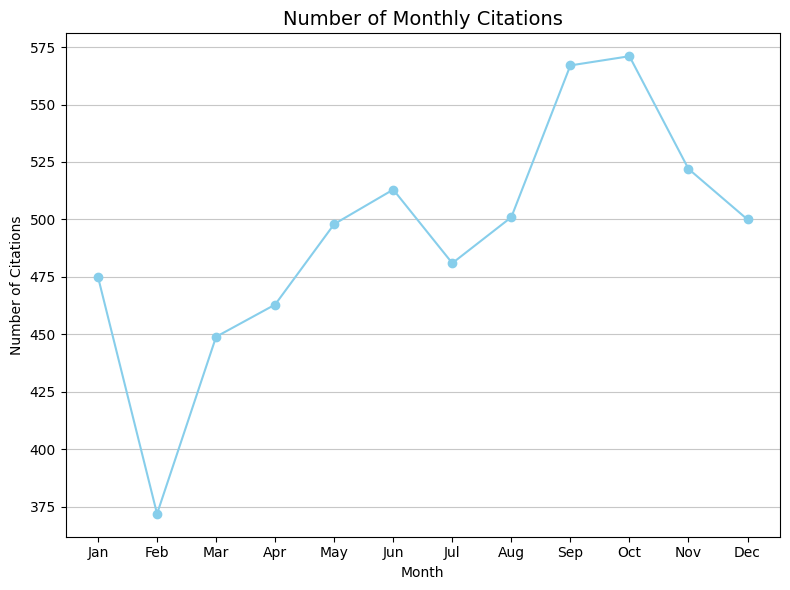

In [6]:
# Plotting line chart for monthly citations issued
plt.figure(figsize=(8, 6))
plt.plot(values_per_month.index, values_per_month['citation_given'], marker='o', label='Citations', color='skyblue')
plt.title('Number of Monthly Citations', fontsize=14)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Number of Citations', fontsize=10)
plt.xticks(ticks=values_per_month.index, labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.tight_layout()
plt.show()


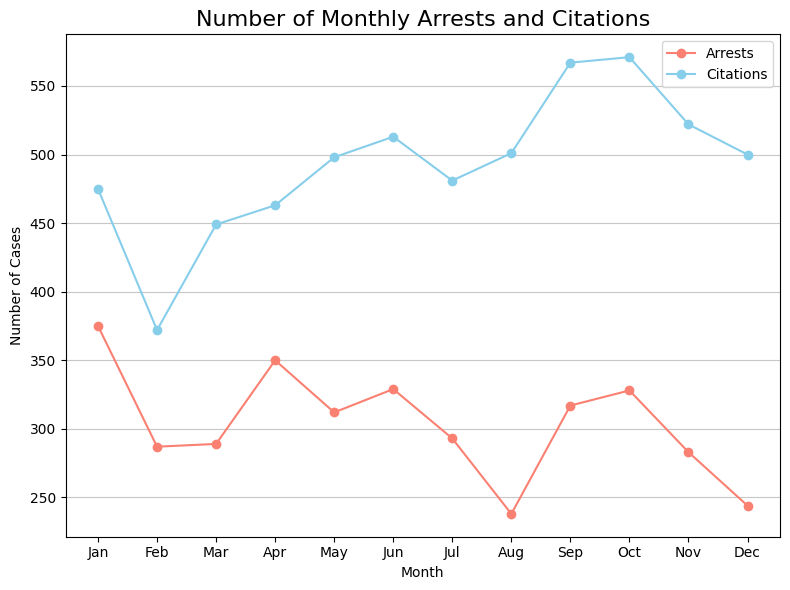

In [7]:
# Plotting line chart for monthly arrests and citations issued on one graph
plt.figure(figsize=(8, 6))
plt.plot(values_per_month.index, values_per_month['arrested'], marker='o', label='Arrests', color='salmon')
plt.plot(values_per_month.index, values_per_month['citation_given'], marker='o', label='Citations', color='skyblue')
plt.title('Number of Monthly Arrests and Citations', fontsize=16)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Number of Cases', fontsize=10)
plt.xticks(ticks=values_per_month.index, labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.legend() 
plt.tight_layout()
plt.show()
